In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Live Demo Regression Models

In [31]:
# Data genenrating - linear function
num_points = 500
x = np.linspace(-3, 3, num_points)
y = 2 * x + 3

#Create noise - loc = 0 is the average value of the noise
y_noise = np.random.normal(loc = 0, scale = 1, size = num_points)
y += y_noise

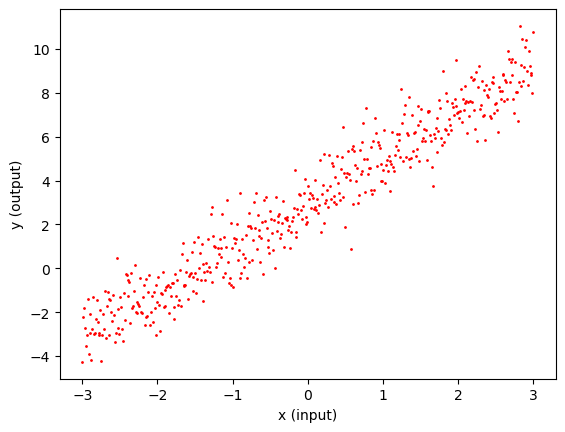

In [32]:
plt.scatter(x, y, c = 'r', s = 1)
plt.xlabel('x (input)')
plt.ylabel('y (output)')

plt.show()

In [33]:
# Create data frame
data = pd.DataFrame({'x': x, 'y':y})

In [34]:
data = data.sample(len(data))
data.to_csv('data_csv', index = None)

In [35]:
pd.read_csv('data_csv')

,x,y
0,0.426854,3.126783
1,2.531062,6.228719
2,0.066132,3.201748
3,0.919840,4.676088
4,-1.460922,1.420274
...,...,...
495,0.294589,3.755453
496,2.603206,8.834101
497,-0.751503,1.837753
498,-2.963928,-2.718231


In [38]:
# Start with assumption
# y = a * x + b
x = data.x.values
y = data.y.values

In [55]:


def plot_model(x, y, a, b):
    y_model = a * x + b
    plt.scatter(x, y)
    plt.plot(x, y_model, c = 'r', label = f' y = {a}x + {b}')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y model')
    plt.show()

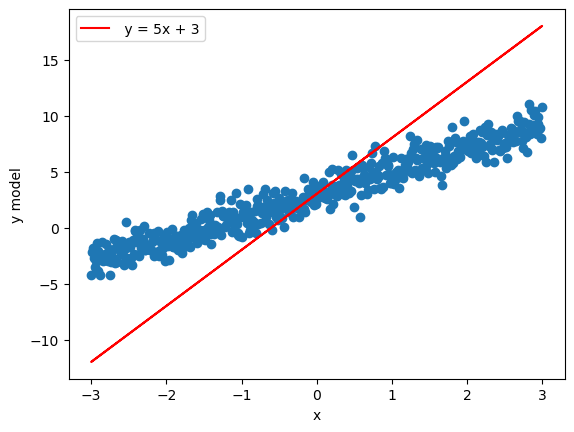

In [56]:
plot_model(x, y, 5, 3)

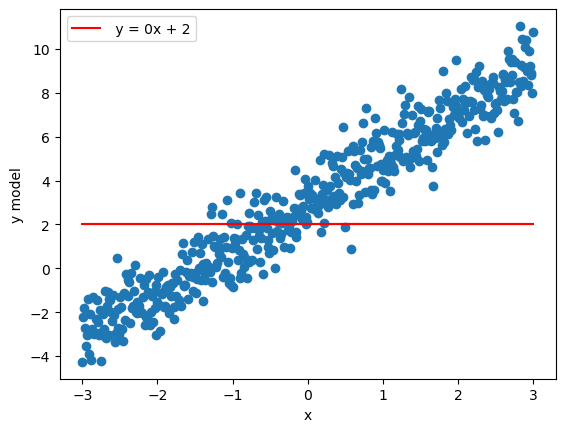

In [57]:
plot_model(x, y, 0, 2)

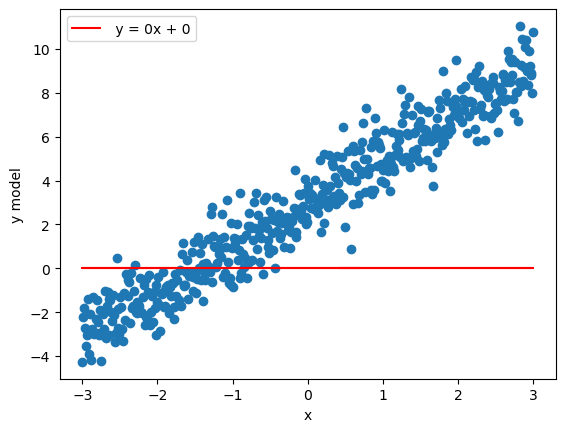

In [58]:
plot_model(x, y, 0, 0)

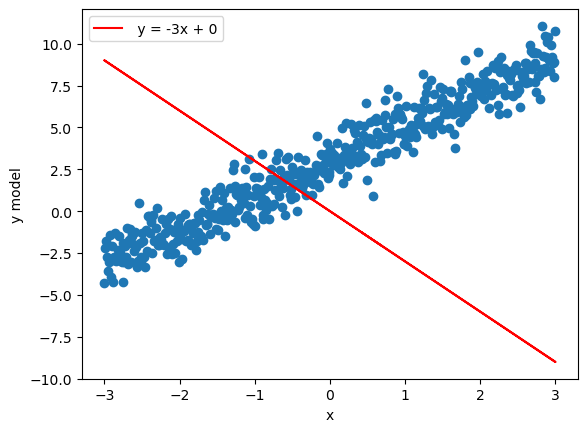

In [59]:
plot_model(x, y, -3, 0)